In [113]:
import theano
import numpy as np

import joblib

from braindecode.veganlasagne.layer_util import print_layers
from braindecode.analysis.plot_util import plot_head_signals_tight,plot_head_signals_tight_with_tube
from braindecode.datasets.sensor_positions import tight_cap_positions
import lasagne
import scipy

import os

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [114]:
from matplotlib import pyplot as plt
import seaborn as sns

In [115]:
import convvisual.receptive_field.receptive_field as receptive_field
import convvisual.analysis.analysis as analysis
import convvisual.analysis.utils as utils
import convvisual.analysis.plot as plot

In [116]:
modelpath = '/home/hartmank/braindecode/data/models/'
modelname = 'paper/ours/cnt/deep4/car/22'
savepath  = '/home/hartmank/data/convvisual/RF_data/'

In [151]:
import os
n_class_inputs = 50
max_baseline_inputs = 2500 # Number of signal windows used for baseline
wins_per_input = 3
num_KS = 20

In [158]:
def make_data(RF_Result,n_chans):
    indexer = {'FFT':0,'FFTc':1,'Phase':2,'Phasec':3,'Mean':4,'Meanc':5,'Power':6}
    RF_Result.max_filters = RF_Result.max_filters
    c = False
    KS_scores = list()
    counts = np.zeros((7,len(RF_Result.max_filters)))
    for i,filt in enumerate(RF_Result.max_filters):
        X_RF_cropped = utils.get_RF(RF_Result,filt,n_chans)[:n_class_inputs]
        if not c:
            X_baseline = utils.cut_baseline(RF_Data.inputs,wins_per_input,X_RF_cropped.shape)[:max_baseline_inputs]
            c = True

        feat_KS,_,feat_labels,feat_class,feat_base = utils.extract_features_and_diff(X_RF_cropped,X_baseline,sampling_rate)
        KS_sorted = np.argsort(feat_KS)[::-1][:num_KS]

        counter = {'FFT':0,'FFTc':0,'Phase':0,'Phasec':0,'Mean':0,'Meanc':0,'Power':0}
        for KS_ind in KS_sorted:
            lbl = feat_labels[KS_ind]
            score = feat_KS[KS_ind]
            counter[lbl[0]] += score

        for key,val in counter.items():
            counts[indexer[key],i] = val

    return counts

In [159]:
def make_plot(data):
    rows = ('FFT','FFTc','Phase','Phasec', 'Mean','Meanc','Power')
    columns = ['Filter %d' % x for x in range(data.shape[1])]

    plt.figure(figsize=(data.shape[1]/3,5))

    colors = plt.cm.jet(np.linspace(0, 0.9, data.shape[0]))
    n_rows = len(data)

    index = np.arange(len(columns)) + 0.3
    bar_width = 0.4

    # Initialize the vertical-offset for the stacked bar chart.
    y_offset = np.array([0.0] * len(columns))

    # Plot bars and create text labels for the table
    cell_text = []
    for row in range(n_rows):
        plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
        y_offset = y_offset + data[row]
        cell_text.append(['%1.1f' % (x) for x in data[row]])
    # Reverse colors and text labels to display the last value at the top.
    colors = colors[::-1]
    cell_text.reverse()
    rows = rows[::-1]

    # Add a table at the bottom of the axes
    the_table = plt.table(cellText=cell_text,
                          rowLabels=rows,
                          rowColours=colors,
                          colLabels=columns,
                          loc='bottom')

    # Adjust layout to make room for the table:
    plt.subplots_adjust(left=0.2, bottom=0.2)


    plt.show()

### Layer 03

In [160]:
RF_Data = receptive_field.load_ExtractorData(os.path.join(savepath,modelname,'ClassAnalysis_AllFilters_NoClass_nUnits200'))
RF_Result = receptive_field.load_ClassData(os.path.join(savepath,modelname,'ClassAnalysis_AllFilters_NoClass_nUnits200'),3,None)

n_chans = RF_Data.n_chans
sensor_names = RF_Data.sensor_names
sampling_rate = RF_Data.sampling_rate

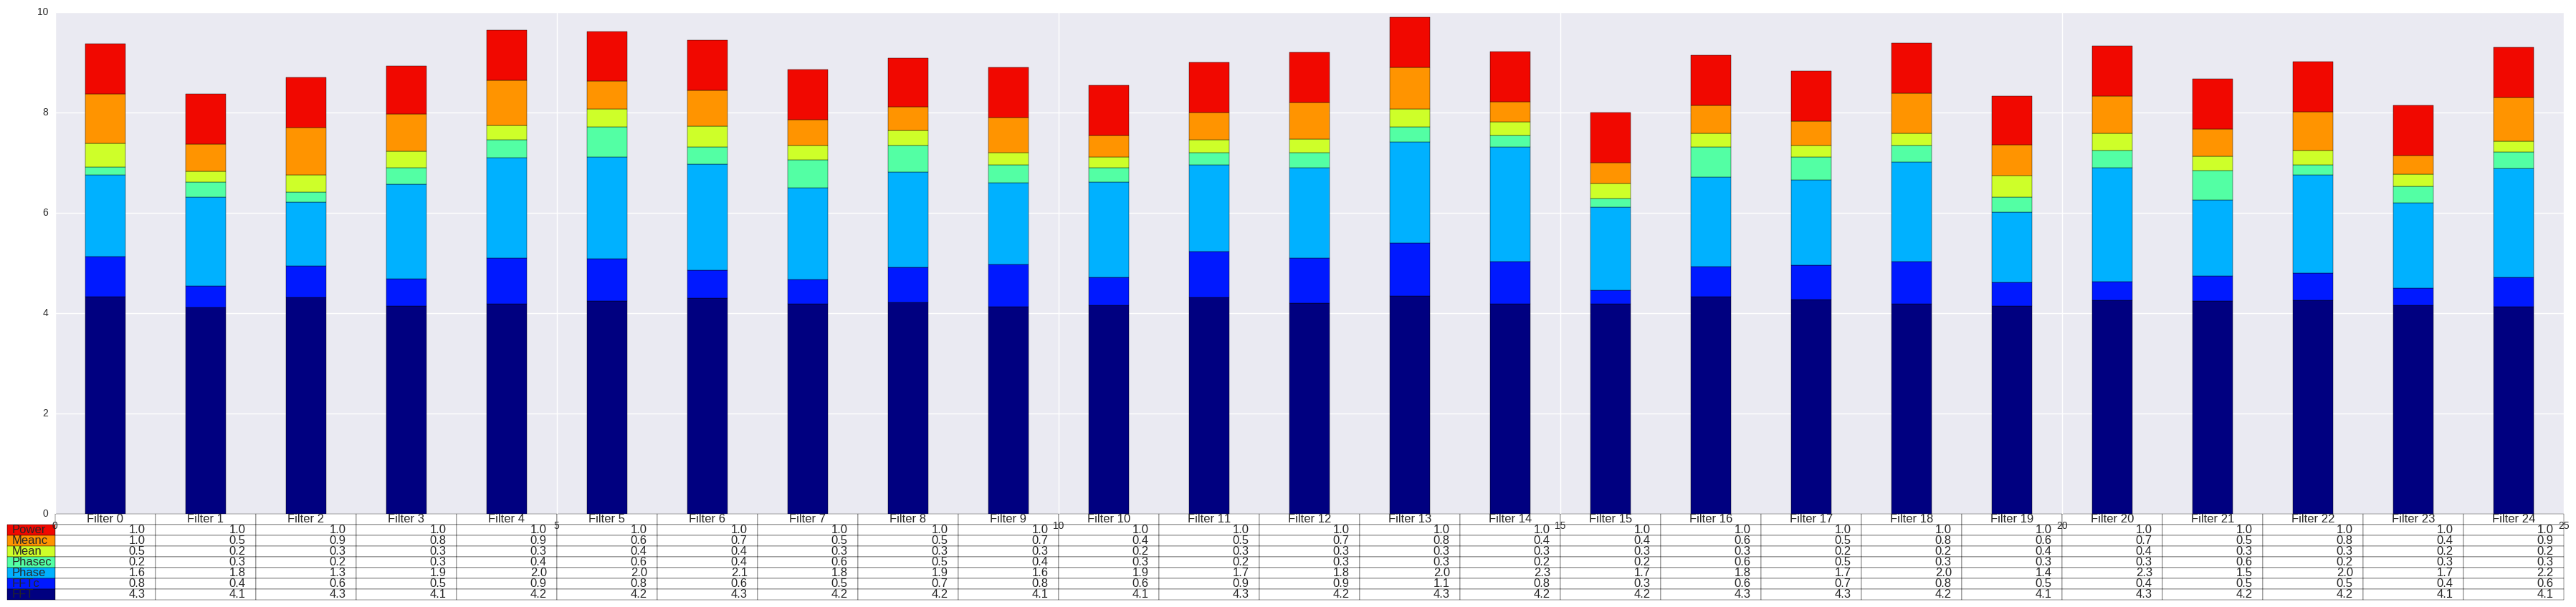

In [162]:
data = make_data(RF_Result,1)
make_plot(data)

### Layer 04

In [152]:
RF_Data = receptive_field.load_ExtractorData(os.path.join(savepath,modelname,'ClassAnalysis_AllFilters_NoClass_nUnits200'))
RF_Result = receptive_field.load_ClassData(os.path.join(savepath,modelname,'ClassAnalysis_AllFilters_NoClass_nUnits200'),4,None)

n_chans = RF_Data.n_chans
sensor_names = RF_Data.sensor_names
sampling_rate = RF_Data.sampling_rate

In [ ]:
data = make_data(RF_Result,n_chans)
make_plot(data)

### Layer 10

In [152]:
RF_Data = receptive_field.load_ExtractorData(os.path.join(savepath,modelname,'ClassAnalysis_AllFilters_NoClass_nUnits200'))
RF_Result = receptive_field.load_ClassData(os.path.join(savepath,modelname,'ClassAnalysis_AllFilters_NoClass_nUnits200'),10,None)

n_chans = RF_Data.n_chans
sensor_names = RF_Data.sensor_names
sampling_rate = RF_Data.sampling_rate

In [ ]:
data = make_data(RF_Result,n_chans)
make_plot(data)

### Layer 16

In [152]:
RF_Data = receptive_field.load_ExtractorData(os.path.join(savepath,modelname,'ClassAnalysis_AllFilters_NoClass_nUnits200'))
RF_Result = receptive_field.load_ClassData(os.path.join(savepath,modelname,'ClassAnalysis_AllFilters_NoClass_nUnits200'),16,None)

n_chans = RF_Data.n_chans
sensor_names = RF_Data.sensor_names
sampling_rate = RF_Data.sampling_rate

In [ ]:
data = make_data(RF_Result,n_chans)
make_plot(data)

### Layer 22

In [152]:
RF_Data = receptive_field.load_ExtractorData(os.path.join(savepath,modelname,'ClassAnalysis_AllFilters_NoClass_nUnits200'))
RF_Result = receptive_field.load_ClassData(os.path.join(savepath,modelname,'ClassAnalysis_AllFilters_NoClass_nUnits200'),22,None)

n_chans = RF_Data.n_chans
sensor_names = RF_Data.sensor_names
sampling_rate = RF_Data.sampling_rate

In [ ]:
data = make_data(RF_Result,n_chans)
make_plot(data)